\newpage

## Question 1


(1) Reference where you obtained the original PDF document.

Origianl PDF document obtained from the paper `Data Science at the Singularity` by David Donoho (2024) at [paper](https://assets.pubpub.org/9bk0194n/Donoho%20(2024)_Just%20Accepted-11706563057147.pdf).
@donoho2023data


(2) Read all PDF document pages and separate each line by `\n`.

In [383]:
import numpy as numpy
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pytz
import pdfplumber

In [384]:
# this NLTK data download is called only one time
nltk.download('punkt')# word_tokenize uses punkt tokenizer model
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lingyunhuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lingyunhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [385]:
def extract_text_from_pdf(pdf_path):
    text = ''
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + '\n'
    return text

pdf_text = extract_text_from_pdf("Donoho (2024)_Just Accepted-11706563057147.pdf")

(3) Split the lines by `\n`.

In [386]:
pdf_text = pdf_text.split('\n')

(4) Remove the lines before `Abstract. .....`. You can print the first few lines and find the number of lines to remove.

In [387]:
print('\n'.join(pdf_text[0:10]))

Just Accepted
DOI: 10.1162/99608f92.b91339ef
ISSN: 2644-2353
Data Science at the Singularity
d
David Donoho†,*
† Stanford University
e
t
Abstract. Something fundamental to computation-based repsearch has really changed


In [388]:
print('\n'.join(pdf_text[9:12]))

Abstract. Something fundamental to computation-based repsearch has really changed
in the last ten years. In certain fields, progress is simply dramatically more rapid than
previously. Researchers in affected fields are living through a period of profound trans-


In [389]:
pdf_text = pdf_text[9:]

In [390]:
print('\n'.join(pdf_text[:5]))

Abstract. Something fundamental to computation-based repsearch has really changed
in the last ten years. In certain fields, progress is simply dramatically more rapid than
previously. Researchers in affected fields are living through a period of profound trans-
formation, as the fields undergo a transition to fricetionless reproducibility (FR). This
transition markedly changes the rate of spread of ideas and practices, affects scientific


(5) Create a data frame with lines.

In [391]:
# pandas dataframe
outline = pd.DataFrame({'line': pdf_text})
outline

,line
0,Abstract. Something fundamental to computation...
1,"in the last ten years. In certain fields, prog..."
2,previously. Researchers in affected fields are...
3,"formation, as the fields undergo a transition ..."
4,transition markedly changes the rate of spread...
...,...
1667,t
1668,s
1669,u
1670,J


(6) Tokenize each line and convert each word to a row.

In [392]:
# tokenize each line
outline['word'] = outline['line'].apply(word_tokenize)
# convert each word to a row
outline = outline.explode('word')
outline

,line,word
0,Abstract. Something fundamental to computation...,Abstract
0,Abstract. Something fundamental to computation...,.
0,Abstract. Something fundamental to computation...,Something
0,Abstract. Something fundamental to computation...,fundamental
0,Abstract. Something fundamental to computation...,to
...,...,...
1667,t,t
1668,s,s
1669,u,u
1670,J,J


(7) Convert each word to lowercase.

In [393]:
outline['word'] = outline['word'].str.lower()
outline

,line,word
0,Abstract. Something fundamental to computation...,abstract
0,Abstract. Something fundamental to computation...,.
0,Abstract. Something fundamental to computation...,something
0,Abstract. Something fundamental to computation...,fundamental
0,Abstract. Something fundamental to computation...,to
...,...,...
1667,t,t
1668,s,s
1669,u,u
1670,J,j


(8) Remove stopwords.

In [394]:
english_stopwords = set(stopwords.words('english'))

In [395]:
outline = outline[~outline['word'].isin(english_stopwords)]
outline.shape

(14049, 2)

(9) Remove any other words that are not suitable for the word cloud. For example, a single letter word, symbols [ . , ) , abbreviation, etc.

In [396]:
# replace single letter
outline['word'] = outline['word'].str.replace(r'\b\w\b', '', regex=True)
# replace all symbols
outline['word'] = outline['word'].str.replace(r'[].,)‘’&[:?;(•-]', '', regex=True)
# replace fr which is abbreviation
outline['word'] = outline['word'].str.replace(r'\bfr\b', '', regex = True)
outline = outline[outline['word'] != '']
outline = outline[outline['word'] != '+']
outline = outline[outline['word'] != '-']
outline = outline[outline['word'] != '–']
outline = outline[outline['word'] != '“']
outline = outline[outline['word'] != '”']
outline.shape

/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_25790/1873473230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outline['word'] = outline['word'].str.replace(r'\b\w\b', '', regex=True)
/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_25790/1873473230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outline['word'] = outline['word'].str.replace(r'[].,)‘’&[:?;(•-]', '', regex=True)
/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_25790/1873473230.py:6: SettingWithCopyWar

(9202, 2)

In [397]:
# check whether the words in stop words
outline = outline[~outline['word'].isin(english_stopwords)]
outline.shape

(9192, 2)

(10) Create a term-frequency data frame.

In [398]:
freq = outline['word'].value_counts().reset_index()
freq.columns = ['word', 'n']
print(freq.head(10))
print(freq.shape)

              word    n
0             data  120
1         research  110
2          science   68
3              new   63
4       challenges   51
5             code   48
6             many   48
7     frictionless   46
8  reproducibility   36
9          sharing   36
(4100, 2)


(11) Produce a word cloud. You can decide on the most frequently used words in the world cloud—for example, word cloud for the ten most frequently used words. 

In [399]:
freq = freq.sort_values(
    by='n', 
    ascending=False
    )

In [400]:
freq_top10 = freq[:10]
freq_top10

,word,n
0,data,120
1,research,110
2,science,68
3,new,63
4,challenges,51
5,code,48
6,many,48
7,frictionless,46
8,reproducibility,36
9,sharing,36


In [401]:
# combine words and frequency into a dictionary
word_freq = dict(
    zip(
        freq_top10['word'], 
        freq_top10['n']
        )
    )

In [402]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

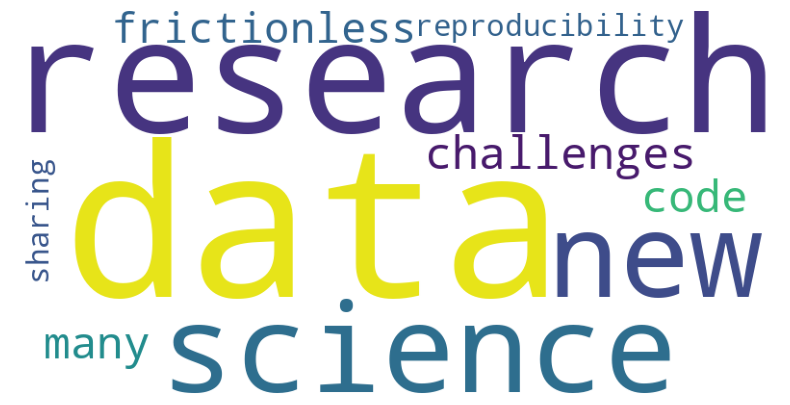

In [403]:
# word cloud theme
wordcloud = WordCloud(width=800, height=400, background_color='white')
# word cloud
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(12) Write a summary paragraph (at least two statements) about your word cloud. The summary should be cast in the context of your chosen text document.

From the top 10 most frequent words in the paper `Data Science at the Singularity`, a word cloud is built to encapsulate the core themes and focal points.\
From the word cloud plot, `Data`, `science` and `research`, these three words dominate the visual, reflecting that the main content of the article revolves around Data Science Research. Significant advances in data processing in data science. They are interrelated with something fundamental in computation-based research mentioned in the text, which has truly changed in the last ten years.\
Then `frictionless reproducibility` occurs, which connect to "FR" in paper. In the paper, 3 data science principles are mentioned: data sharing, code sharing, and competitive challenges. Words `data`, `code`, `sharing` and `challenges` are in the word cloud and they are the top 10 most frequent words in the paper. This reflects the discussion throughout the entire text revolving around the 3 data science principles, with these words being used very frequently.

\newpage

## Question 2

Question 2 uses Johns Hopkins GitHub data on the COVID-19 global vaccine administered to develop a Shiny App.

(1) Read the CSV file

In [404]:
covid19 = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv')
covid19.head(5)

,Date,UID,Province_State,Country_Region,Doses_admin,People_at_least_one_dose
0,2020-12-29,40.0,NaN,Austria,2123.0,2123.0
1,2020-12-29,48.0,NaN,Bahrain,55014.0,55014.0
2,2020-12-29,112.0,NaN,Belarus,0.0,0.0
3,2020-12-29,56.0,NaN,Belgium,340.0,340.0
4,2020-12-29,124.0,NaN,Canada,59079.0,59078.0


(2) Each row is uniquely defined by country and date in the data frame. What is the dimension of the data?

In [405]:
covid19.shape

(142597, 6)

The shape is (142597, 6), indicating that there are 142,597 rows and 6 columns in the data frame.

(3) Look at the data dictionary. Describe the `Doses_admin` and `People at least one dose administered` variables.

`Doses_admin` is Cumulative number of doses administered. When a vaccine requires multiple doses, each one is counted independently\
`People_at_least_one_dose` is Cumulative number of people who received at least one vaccine dose. When the person receives a prescribed second dose, it is not counted twice

(4) Identify the data frame column representing the countries. Then, select the rows in the data frame for Canada.

In [406]:
canada_cov = covid19[covid19['Country_Region'] == 'Canada']
canada_cov['Date'] = pd.to_datetime(canada_cov['Date'])
canada_cov.head(5)

/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_25790/2608245826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_cov['Date'] = pd.to_datetime(canada_cov['Date'])


,Date,UID,Province_State,Country_Region,Doses_admin,People_at_least_one_dose
4,2020-12-29,124.0,NaN,Canada,59079.0,59078.0
40,2020-12-30,124.0,NaN,Canada,72092.0,72090.0
76,2020-12-31,124.0,NaN,Canada,80641.0,80639.0
116,2021-01-01,124.0,NaN,Canada,96170.0,96168.0
156,2021-01-02,124.0,NaN,Canada,105461.0,105458.0


(5) Use only the Canada vaccine data to answer the rest of the questions. Plot the time series data of `Dose_dmin` and `People_at_least_one_dose` in the same graph. Label the time series lines by `Doses Administered` and `People at least one dose administered`, respectively. Convert the y-axis to the log scale. Rotate the x-axis ticks by 45 degrees.

In [407]:
import matplotlib.pyplot

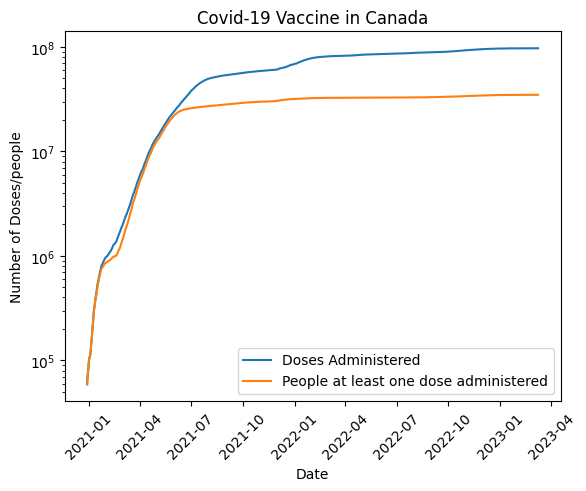

In [408]:
# as 'Date' has been converted by canada_cov['Date'] = pd.to_datetime(canada_cov['Date']) in (4)
matplotlib.pyplot.plot(canada_cov['Date'], canada_cov['Doses_admin'], label='Doses Administered')
matplotlib.pyplot.plot(canada_cov['Date'], canada_cov['People_at_least_one_dose'], label='People at least one dose administered')
matplotlib.pyplot.xlabel('Date')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.ylabel('Number of Doses/people')
matplotlib.pyplot.yscale('log')
matplotlib.pyplot.title('Covid-19 Vaccine in Canada')
matplotlib.pyplot.legend()

(6) Describe the plot in the context of data.

From this graph, we can observe that starting from January 2021, both `doses administered` and `people at least one dose administered` have been increasing together. This can be understood as the initial rollout of vaccines, where everyone is receiving their first dose. Around February 2021, the two lines diverge, with `doses administered` exceeding the number of `people at least one dose administered`. This indicates that some individuals have begun receiving their second dose of the vaccine, causing the number of `people at least one dose administered` to increase slowly while `doses administered` continue to grow and surpass it. From around April 2021, the number of people at least one `dose administered` rapidly increases, gradually approaching `doses administered`. After June 2021, there is a second divergence, with the gap between `doses administered` and `people at least one dose administered` increasing, suggesting that many individuals are receiving their second dose of the vaccine, and fewer are receiving their first dose.

(7) Create the Shiny app as follows. In the Shiny app, the user input is any starting and ending dates. The range of dates may be `2020-12-29` to `2023-03-09`. The output is the time series plot for the logarithm of the `doses administrated` and `people at least one dose administrated` in Canada for the range of dates the users choose. You can use the following template to create the Shiny app. 

In [409]:
from shiny import App, render, ui

# import required libraries
import matplotlib.pyplot
import pandas as pd

app_ui = ui.page_fluid(
    ui.input_date_range(
        "daterange", 
        "Date range", 
        start="2020-12-29", 
        end='2023-03-09'
        ),  
    ui.output_plot('myplot'),
)

def server(input, output, session):
    @output
    @render.plot
    def myplot():
        
        # Read the data
        covid19 = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv')
        # select the data for Canada
        df = covid19[covid19['Country_Region'] == 'Canada']
        # If you call the data frame as `df`, then the 
        # following codes select the rows in the user 
        df['Date'] = pd.to_datetime(df['Date'])
        # selected date range
        df = df[df['Date'] > pd.Timestamp(input.daterange()[0])]
        df = df[df['Date'] < pd.Timestamp(input.daterange()[1])]
        
        # Create the plot using `df`
        matplotlib.pyplot.plot(df['Date'], df['Doses_admin'], label='Doses Administered')
        matplotlib.pyplot.plot(df['Date'], df['People_at_least_one_dose'], label='People at least one dose administered')
        matplotlib.pyplot.xlabel('Date')
        matplotlib.pyplot.xticks(rotation=45)
        matplotlib.pyplot.ylabel('Number of Doses/people')
        matplotlib.pyplot.yscale('log')
        matplotlib.pyplot.title('Covid-19 Vaccine in Canada')
        matplotlib.pyplot.legend()
 

app = App(app_ui, server)

(8) Deploy your Shiny app at [https://www.shinyapps.io/](https://www.shinyapps.io/). Then, provide the link to the app—for example, [https://pratheepaj.shinyapps.io/my_app/](https://pratheepaj.shinyapps.io/my_app/).

link is here\
[https://huangl57.shinyapps.io/html_page_app/](https://huangl57.shinyapps.io/html_page_app/).


## 3. Helper's name.

Xiangdong Wang\
Discussed abou soloving error when trying to deploy shiny app.

\newpage

## References
